# 기초 사용법

[opencv document](https://docs.opencv.org/4.5.5/)

In [1]:
import cv2

In [2]:
cv2.__version__

'4.5.5'

In [15]:
img = cv2.imread('./data/lenna.bmp')

print(img.shape)

cv2.namedWindow("image")
cv2.imshow("image", img)

## 종료조건
cv2.waitKey()
cv2.destroyAllWindows()

(512, 512)


### Workshop : 영상 파일 읽기 및 화면 표시

1. './data/lena.jpg' 파일을 읽어 들여서 컬러로 화면에 표시하고 키보드에서 아무 키나 누르면 윈도우가 사라지도록 하라.

2. './data/lena.jpg' 파일을 읽어 들여서 흑백으로 화면에 표시하고 키보드에서 아무 키나 누르면 윈도우가 사라지도록 하라.

In [16]:
# TODO
imgFile = './data/lena.jpg'

imgColor = cv2.imread(imgFile, cv2.IMREAD_COLOR)
imgGray = cv2.imread(imgFile, cv2.IMREAD_GRAYSCALE)

cv2.imshow("Lene Color", imgColor)
cv2.imshow("Lene GrayScale", imgGray)

cv2.waitKey()
cv2.destroyAllWindows()


### Workshop : 영상 파일 저장

1. './data/lena.jpg' 파일을 읽어 들여서 bmp 파일 형식의 './out/Lena.bmp'로 저장하라.

2. './data/lena.jpg' 파일을 읽어 들여서 png 파일 형식의 './out/Lena.png'로 저장하라.

3. './data/lena.jpg' 파일을 읽어 들여서 png 파일 형식의 './out/Lena2.png'로 저장하되 압축률 90%를 적용하라. 

4. './data/lena.jpg' 파일을 읽어 들여서 jpg 파일 형식의 './out/Lena2.jpg'로 저장하되 압축률 50%를 적용하라 

In [17]:
# TODO
imgFile = './data/lena.jpg'
imgColor = cv2.imread(imgFile, cv2.IMREAD_COLOR)

cv2.imwrite('./out/Lena.bmp', imgColor)
cv2.imwrite('./out/Lena.png', imgColor)

cv2.imwrite('./out/Lena2.png', imgColor, [cv2.IMWRITE_PNG_COMPRESSION, 9]) #0~9
cv2.imwrite('./out/Lena2.jpg', imgColor, [cv2.IMWRITE_JPEG_QUALITY, 90]) #0~100

True

### Workshop : matplotlib 1 컬러영상 표시
1. openCV를 이용해 './data/lena.jpg' 파일을 읽어 들인 후 matplotlib.pyplot의 imshow() 함수를 사용해 화면에 표시하라. 
- 결과 확인
2. openCV를 이용해 './data/lena.jpg' 파일을 읽어 들인 후 matplotlib.pyplot의 imshow() 함수를 사용해 화면에 표시하라. 
- 표시된 결과가 원본과 동일한 색조가 되도록 변환 후 화면에 표시
3. openCV를 이용해 './data/lena.jpg' 파일을 읽어 들인 후 matplotlib.pyplot의 imshow() 함수를 사용해 화면에 표시하라. 
- numpy ndarray의 색인 문법으로 컬러 채널의 순서를 변경

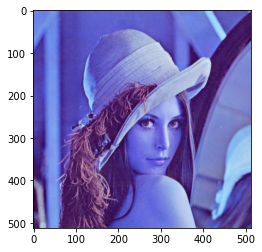

In [20]:
#TODO
import matplotlib.pyplot as plt
imgFile = './data/lena.jpg'
img = cv2.imread(imgFile)

plt.imshow(img)

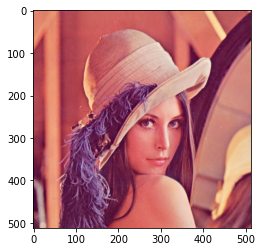

In [21]:
imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(imgRGB)

In [22]:
img.shape

(512, 512, 3)

uint8


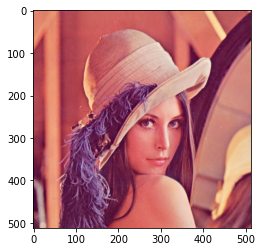

In [32]:
import numpy as np

imgRGB = np.zeros(img.shape, dtype='uint8')
print(imgRGB.dtype)

imgRGB[:, :, 2] = img[:, :, 0] #blue channel
imgRGB[:, :, 1] = img[:, :, 1] #green channel
imgRGB[:, :, 0] = img[:, :, 2] #red channel

plt.imshow(imgRGB)

float64


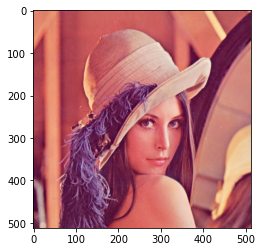

In [30]:
import numpy as np

imgRGB = np.zeros(img.shape)
print(imgRGB.dtype)

imgRGB[:, :, 2] = img[:, :, 0] #blue channel
imgRGB[:, :, 1] = img[:, :, 1] #green channel
imgRGB[:, :, 0] = img[:, :, 2] #red channel

imgRGB= imgRGB/255.0 #0~1

plt.imshow(imgRGB)

# 행렬 연산

### 행렬 : numpy ndarray

In [35]:
import sys

img = cv2.imread('./data/cat.bmp', cv2.IMREAD_GRAYSCALE)

if img is None:
    print("Image load failed!!!")
    sys.exit()
    
print("type(img) : ", type(img))
print("shape(img) : ", img.shape)

cv2.imshow("img", img)
cv2.waitKey()
cv2.destroyAllWindows()

type(img) :  <class 'numpy.ndarray'>
shape(img) :  (480, 640)


### 행렬의 생성과 초기화

In [38]:
img1 = np.empty((480, 640), np.uint8)
img2 = np.zeros((480, 640), np.uint8)
img3 = np.ones((480, 640), np.uint8)

img4 = np.full((480, 640), 0, np.float32)
print(type(img1), type(img2), type(img3), type(img4))

<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [42]:
l = [[1, 2, 3, 4],
     [5, 6, 7, 8],
     [9, 10, 11, 12]] #python list

mat = np.array(l)
print(type(mat), '\n', mat)

<class 'numpy.ndarray'> 
 [[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


In [44]:
mat[0, 1] = 100
mat

array([[  1, 100,   3,   4],
       [  5,   6,   7,   8],
       [  9,  10,  11,  12]])

In [48]:
mat[2, :] = 200
mat

array([[  1, 100,   3,   4],
       [  5,   6,   7,   8],
       [200, 200, 200, 200]])

### 행렬의 복사

In [51]:
img1 = cv2.imread('./data/cat.bmp')

img2 = img1
img3 = img1.copy()

img1[:, :] = (0, 255, 255) #yellow

cv2.imshow("img2", img2)
cv2.imshow("img3", img3)
cv2.waitKey()
cv2.destroyAllWindows()

### 행렬 원소값 참조

In [57]:
np.arange(12).reshape(3, 4)

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [64]:
mat1 = np.array(np.arange(12).reshape(3, 4))

mat2 = np.zeros(mat1.shape, type(mat1))

h, w = mat1.shape

for j in range(h):
    for i in range(w):
        mat2[j, i] = mat[j, i] + 10
        
print(mat1)
print(mat2)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[[10 11 12 13]
 [14 15 16 17]
 [18 19 20 21]]


In [65]:
mat2 = mat1 + 10 # broadcasting
mat2

### 행렬 연산

In [70]:
mat1 = np.ones((3, 4), np.int32)
mat2 = np.arange(12).reshape(3, 4)
mat3 = mat1 + mat2
mat4 = mat2 * 2

array([[ 0,  2,  4,  6],
       [ 8, 10, 12, 14],
       [16, 18, 20, 22]])

### Workshop : 이미지에 테두리 그리기

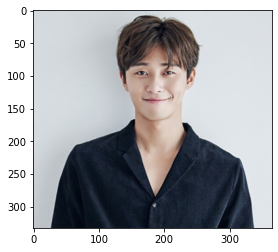

In [72]:
img = plt.imread('./data/psj.png')
plt.imshow(img)

In [74]:
img.shape, type(img)

((333, 365, 4), numpy.ndarray)

In [75]:
img[0, 0]

array([0.83137256, 0.8509804 , 0.8666667 , 1.        ], dtype=float32)

In [80]:
img[0, 0, 0] = 1 #R channel에 최대 밝기값 부여
img[0, 0, 1] = 0 #G channel에 최소 밝기값 부여
img[0, 0, 2] = 0 #B channel에 최소 밝기값 부여

In [81]:
img[0, 0]

array([1., 0., 0., 1.], dtype=float32)

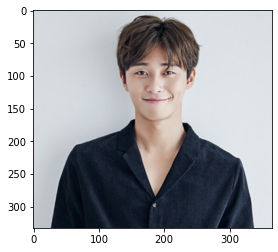

In [82]:
plt.imshow(img)